# Plotting 1

We have a handle on python now: we understand the data structures and enough about working with them to move on to stuff more directly relevant to data analysis. We know how to get data into Pandas from files, how to manipulate DataFrames and how to do basic statistics. 

Let's work through a few more of matplotlib's basic figures. We will come back to figures a later to work on some of the more complex visualizations. 

### The packages

In [4]:
import pandas as pd     #load the pandas package and call it pd
import matplotlib.pyplot as plt   # load the pyplot set of tools from the package matplotlib. Name it plt for short.
from pandas_datareader import data, wb    # we are grabbing the data and wb functions from the package
import datetime as dt                     # for time and date

# This following is a jupyter magic command. It tells jupyter to insert the plots into the notebook
# rather than a new window.
%matplotlib inline      

## Bar charts
Bar charts are useful for describing relatively few observations of categorical data --- meaning that one of the axes is not quantitative. [Tufte](https://www.edwardtufte.com/tufte) would complain that they have a lot of redundant ink, but they are quite popular...and Tufte is not our dictator. Although, it's always good to think about what our figures are doing for us.   

Bar charts are much better than pie charts for displaying the relative size of data. There are discussions of this all over the net (here is [one](http://www.storytellingwithdata.com/blog/2011/07/death-to-pie-charts) I like) but the anti-pie-chart argument boils down to: pie charts are hard to read.   
1. Humans are bad at judging the relative sizes of 2D spaces. They cannot tell if one slice is 10% larger than another slice.
2. The MS Excel style of coloring the slice different colors creates problems. Humans judge darker colors to have larger areas. 
2. To get quantitative traction, people label the slices with the data values. In this case, a table of numbers is probably a better way to share the data.

In [82]:
# PPP GDP data from the penn world tables 

code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

gdp = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
gdp

,gdppc,country
USA,53.1,United States
FRA,36.9,France
JPN,36.3,Japan
CHN,11.9,China
IND,5.4,India
BRA,15.0,Brazil
MEX,16.5,Mexico


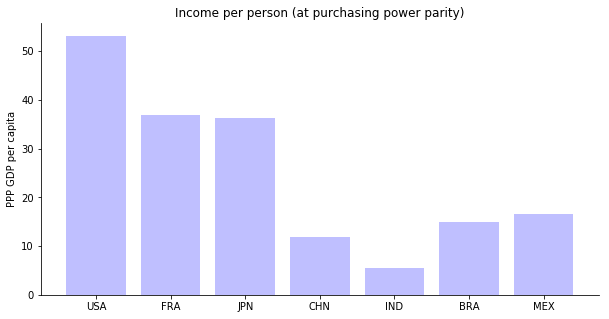

In [92]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(gdp.index, gdp['gdppc'], color='blue', alpha=0.25)      # bar(x labels, )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('PPP GDP per capita')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

The ordering of the bars is pretty random. We could sort it poor to rich.

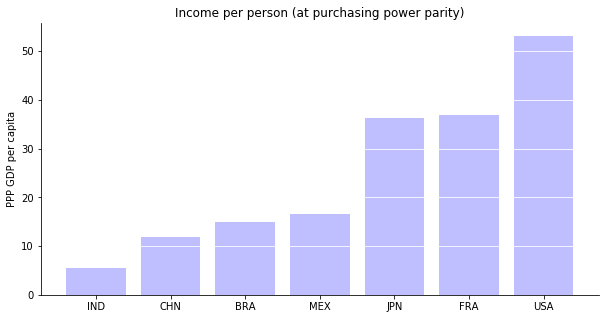

In [93]:
fig, ax = plt.subplots(figsize=(10,5))

gdp_sort= gdp.sort_values('gdppc')

ax.bar(gdp_sort.index, gdp_sort['gdppc'], color='blue', alpha=0.25)      # bar(x labels, )
ax.grid(axis='y', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Income per person (at purchasing power parity)')
ax.set_ylabel('PPP GDP per capita')

plt.show()

### Practice: Bar charts
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Create a horizontal bar chart. Check the documentation for `barh()`
2. Fix up your figure labels, etc. 

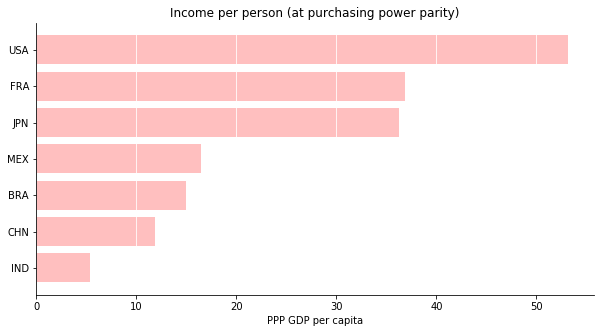

In [103]:
fig, ax = plt.subplots(figsize=(10,5))

gdp_sort= gdp.sort_values('gdppc')

ax.barh(gdp_sort.index, gdp_sort['gdppc'], color='red', alpha=0.25)      # bar(x labels, )
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('PPP GDP per capita')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

3. Create a new horizontal bar chart where each bar is gdp per capita relative to the United States. So USA =1, MEX = 0.31, etc. 

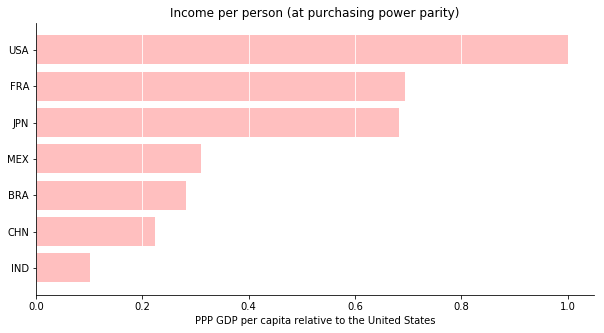

In [104]:
gdp_sort['rel_gdp'] = gdp_sort['gdppc']/gdp_sort.loc['USA', 'gdppc']

fig, ax = plt.subplots(figsize=(10,5))

ax.barh(gdp_sort.index, gdp_sort['rel_gdp'], color='red', alpha=0.25)      # bar(x labels, )
ax.grid(axis='x', color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('PPP GDP per capita relative to the United States')
ax.set_title('Income per person (at purchasing power parity)')

plt.show()

## Scatter plots

Scatter plots are used to compare two variables. A very common approach to visualize the correlation of two variables. 

In [9]:
codes = ['GDPC1', 'UNRATE']                                         # real gdp, unemployment rate
start = dt.datetime(1970, 1, 1)
fred = data.DataReader(codes, 'fred', start)

fred.head()


,GDPC1,UNRATE
DATE,,
1970-01-01,4936.594,3.9
1970-02-01,NaN,4.2
1970-03-01,NaN,4.4
1970-04-01,4943.600,4.6
1970-05-01,NaN,4.8


Gremlins! The gdp data is quarterly, but the unemployment rate is monthly. Let's fix this by downsampling to quarterly frequency. The FRED datareader is really good --- the index is already a datetime object. (How would you check?)

In [10]:
fred_q=fred.resample('q').mean()                # Create an average quarterly unemployment rate
fred_q.head()

,GDPC1,UNRATE
DATE,,
1970-03-31,4936.594,4.166667
1970-06-30,4943.600,4.766667
1970-09-30,4989.159,5.166667
1970-12-31,4935.693,5.833333
1971-03-31,5069.746,5.933333


In [52]:
fred_q['gdp_gr'] = fred_q['GDPC1'].pct_change()*100        # growth rate of gdp. we've seen this a few times...
fred_q['unemp_dif'] = fred_q['UNRATE'].diff()              # difference takes the first difference: u(t)-u(t-1)   
fred_q.head()

,GDPC1,UNRATE,gdp_gr,unemp_dif
DATE,,,,
1970-03-31,4936.594,4.166667,NaN,NaN
1970-06-30,4943.600,4.766667,0.141920,0.600000
1970-09-30,4989.159,5.166667,0.921575,0.400000
1970-12-31,4935.693,5.833333,-1.071644,0.666667
1971-03-31,5069.746,5.933333,2.715991,0.100000


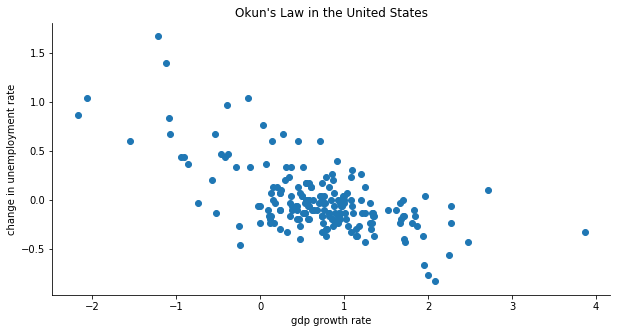

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q.gdp_gr, fred_q.unemp_dif)

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


### Practice: Scatters
Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

Let's explore some of scatter plot's options. 

1. Change the color of the dots to red and lighten them up using alpha 


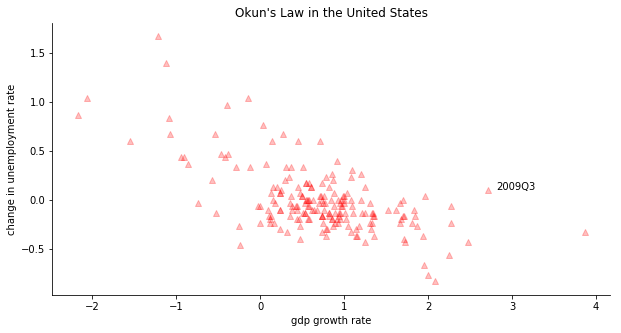

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q.gdp_gr, fred_q.unemp_dif, color='red', alpha = 0.25, marker = '^')

ax.text(fred_q.loc['1971-3-31', 'gdp_gr']+0.1, fred_q.loc['1971-3-31', 'unemp_dif'], '2009Q3', ha='left')

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Check out the documentation for [marker styles](https://matplotlib.org/api/markers_api.html). 

3. Change the marker to a triangle. 
4. Use text() or annotate() to label the point corresponding to third quarter 2009: '2009Q3'

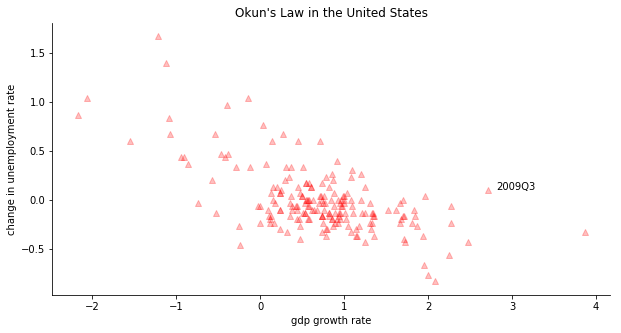

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q.gdp_gr, fred_q.unemp_dif, color='red', alpha = 0.25, marker = '^')

ax.scatter(x, b+m*x, color='black')

ax.text(fred_q.loc['1971-3-31', 'gdp_gr']+0.1, fred_q.loc['1971-3-31', 'unemp_dif'], '2009Q3', ha='left')

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Scatter plots are very useful and we can do a lot more with them. Places to go from here.
1. Add a line of best fit. A bit clunky in matplotlib (use np's polyfit command), but not too bad. Seaborn has a regplot command that makes this dead simple. 
2. Make data markers different colors or sizes depending on the value of a third variable. For example, you could get some more data and color the markers for years with a repbulican president red and markers for years with democratic presidents blue. 
3. Other ideas? Let me know!
